<a href="https://colab.research.google.com/github/milioe/Moravec/blob/main/3_ComputerVision1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks and Computer Vision with TF

* [`Pizza link`](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)

* [`10 food all classes`](10_food_classes_all_data)

What we are going to cover:
* Getting a dataset
* Architecture of Convolutional Neural Network
* Quick end-to-end example
* Steps in modelling for binary image classification
  * Preparing data
  * Creating CNN Architecture
  * Fitting a model
  * Evaluating a model
  * Improving a model
  * Making a prediction
* Steps in modelling for multi-class image classification


# Getting data

We take a preprocessed dataset taken from [`Food 101 image dataset`](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)

In [1]:
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-07-13 02:25:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  44.9MB/s    in 2.3s    

2022-07-13 02:25:48 (44.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
!ls 

pizza_steak  pizza_steak.zip  sample_data


In [5]:
!ls pizza_steak/

test  train


In [6]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [7]:
import os # move through os system or files
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [8]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [9]:
# View images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0]) # target_folder/test/00001.jpg
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img



Image shape: (384, 512, 3)


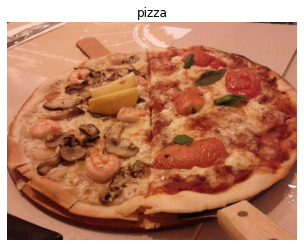

In [10]:
img = view_random(target_dir="pizza_steak/train/",
                  target_class="pizza")

In [11]:
img

array([[[ 78,  22,   0],
        [ 84,  28,   5],
        [102,  46,  23],
        ...,
        [115,  81,  71],
        [118,  82,  70],
        [119,  81,  68]],

       [[132,  76,  53],
        [149,  93,  70],
        [174, 118,  95],
        ...,
        [118,  82,  70],
        [120,  82,  69],
        [121,  81,  69]],

       [[193, 135, 113],
        [206, 148, 126],
        [220, 162, 140],
        ...,
        [124,  81,  72],
        [126,  82,  71],
        [126,  82,  69]],

       ...,

       [[ 51,  30,  27],
        [ 48,  27,  24],
        [ 46,  25,  22],
        ...,
        [196, 135, 106],
        [194, 135, 105],
        [194, 134, 106]],

       [[ 53,  32,  29],
        [ 50,  29,  26],
        [ 48,  27,  24],
        ...,
        [202, 141, 110],
        [197, 136, 107],
        [193, 134, 104]],

       [[ 46,  25,  22],
        [ 44,  23,  20],
        [ 44,  23,  20],
        ...,
        [211, 148, 117],
        [202, 141, 112],
        [194, 135, 105]]

In [12]:
img/255.0

array([[[0.30588235, 0.08627451, 0.        ],
        [0.32941176, 0.10980392, 0.01960784],
        [0.4       , 0.18039216, 0.09019608],
        ...,
        [0.45098039, 0.31764706, 0.27843137],
        [0.4627451 , 0.32156863, 0.2745098 ],
        [0.46666667, 0.31764706, 0.26666667]],

       [[0.51764706, 0.29803922, 0.20784314],
        [0.58431373, 0.36470588, 0.2745098 ],
        [0.68235294, 0.4627451 , 0.37254902],
        ...,
        [0.4627451 , 0.32156863, 0.2745098 ],
        [0.47058824, 0.32156863, 0.27058824],
        [0.4745098 , 0.31764706, 0.27058824]],

       [[0.75686275, 0.52941176, 0.44313725],
        [0.80784314, 0.58039216, 0.49411765],
        [0.8627451 , 0.63529412, 0.54901961],
        ...,
        [0.48627451, 0.31764706, 0.28235294],
        [0.49411765, 0.32156863, 0.27843137],
        [0.49411765, 0.32156863, 0.27058824]],

       ...,

       [[0.2       , 0.11764706, 0.10588235],
        [0.18823529, 0.10588235, 0.09411765],
        [0.18039216, 0

## Resources:
* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
* [Explained Visually](https://setosa.io/ev/image-kernels/)
* [Food 101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/)
* [Distil Pub](https://distill.pub/)
* [A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

🚨 **Baseline_** 50.76% random forest accuracy

## Hyperparameters

* `2D` - means `x`, `y`, two dimensional (height, width), even tough we have 3 color channels
* `kernel_size`- size of our filter 
* `filter` - **feature extractor**
* `stride` - the number of pixels a filter will move across as it covers the image
* `padding` - it can be either `same` or `valid`
  * `same` = adds zeros to the outside
  * `valid` = adds cuts off excess pixels where the filter doesn't fit (e.g. 224 pixels wide divided by a kernel sixe of 3 (224/3=74.6) means a single pixel will get cut off of the end)

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0. Set random seed
tf.random.set_seed(42)

## IMAGE PREPROCESSING ##
# a. Preprocess data (get all pixels between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

# b. Setup train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# c. Import data from directories (X_train, y_train)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # image pixels
                                               class_mode="binary", # pizza vs steak
                                               seed=42)
# (X_test, y_test) 
valid_data = valid_datagen.flow_from_directory(test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

####################################
# 1. Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224,3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])


# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # 47 # any number(:
                        validation_data=valid_data,
                        validation_steps=len(valid_data)) # 16



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 203ms/step - loss: 0.5713 - accuracy: 0.6940 - val_loss: 0.4308 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4302 - accuracy: 0.8100 - val_loss: 0.4129 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4074 - accuracy: 0.8200 - val_loss: 0.3439 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3594 - accuracy: 0.8447 - val_loss: 0.4007 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3283 - accuracy: 0.8587 - val_loss: 0.2814 - val_accuracy: 0.8880


In [14]:
len(train_data), len(valid_data)

(47, 16)

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [16]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 132ms/step - loss: 0.2814 - accuracy: 0.8880


[0.2814335823059082, 0.8880000114440918]

## Model 2

In [17]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# 2 compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3 Fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data), # lenght of train dataset = 47
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 193ms/step - loss: 1.1224 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


`model_1` has 31,101 trainable parameters

`model_2` has 602,141 trainable parameters

🔑 **Note**: Think of trainable parameters as *patterns* a model can learn from data (or from images). More layers (or units) does not mean more parameters. 

**Fully-connected layers** vs old architectures



In [19]:
# Set random seed
tf.random.set_seed(42)

# # Create model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
model_3.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 179ms/step - loss: 2.4675 - accuracy: 0.6527 - val_loss: 2.6882 - val_accuracy: 0.5300
Epoch 2/10
47/47 [==============================] - 8s 175ms/step - loss: 1.0542 - accuracy: 0.6827 - val_loss: 0.6555 - val_accuracy: 0.7780
Epoch 3/10
47/47 [==============================] - 8s 174ms/step - loss: 0.6841 - accuracy: 0.7560 - val_loss: 1.0972 - val_accuracy: 0.6060
Epoch 4/10
47/47 [==============================] - 8s 174ms/step - loss: 0.5885 - accuracy: 0.7613 - val_loss: 0.4898 - val_accuracy: 0.7680
Epoch 5/10
47/47 [==============================] - 8s 175ms/step - loss: 0.4564 - accuracy: 0.7927 - val_loss: 0.5240 - val_accuracy: 0.7220
Epoch 6/10
47/47 [==============================] - 8s 175ms/step - loss: 0.4232 - accuracy: 0.8147 - val_loss: 0.4554 - val_accuracy: 0.7640
Epoch 7/10
47/47 [==============================] - 8s 176ms/step - loss: 0.4203 - accuracy: 0.8220 - val_loss: 0.4541 - val_accuracy: 0.7860
Epoch 8/10
47/47 

In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
score1 = model_1.evaluate(train_data)[1]
score2 = model_2.evaluate(train_data)[1]
score3 = model_3.evaluate(train_data)[1]

47/47 [==============================] - 6s 130ms/step - loss: 0.3868 - accuracy: 0.8247


In [22]:
import pandas as pd
summary = pd.DataFrame({"Model1":score1, "Model2":score2, "Model3":score3}, index=[0])
summary

,Model1,Model2,Model3
0,0.895333,0.5,0.824667


## Re-Preprocessing Data

In [23]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-07-13 02:29:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  43.5MB/s    in 2.4s    

2022-07-13 02:29:31 (43.5 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [24]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [27]:
# Get a sample of the training data batch
images, labels = train_data.next() # get "next" batch of images/labels

In [28]:
len(images), len(labels)

(32, 32)

In [29]:
images[:2], images[0].shape

(array([[[[0.8196079 , 0.69411767, 0.53333336],
          [0.8196079 , 0.69411767, 0.53333336],
          [0.8235295 , 0.69803923, 0.54509807],
          ...,
          [0.05882353, 0.05882353, 0.06666667],
          [0.07058824, 0.07058824, 0.07843138],
          [0.07058824, 0.07058824, 0.07843138]],
 
         [[0.8117648 , 0.6862745 , 0.5372549 ],
          [0.8196079 , 0.69411767, 0.54509807],
          [0.8196079 , 0.69411767, 0.54509807],
          ...,
          [0.05490196, 0.04705883, 0.05882353],
          [0.07058824, 0.0627451 , 0.07450981],
          [0.07058824, 0.0627451 , 0.07450981]],
 
         [[0.8352942 , 0.7058824 , 0.5764706 ],
          [0.8352942 , 0.7176471 , 0.58431375],
          [0.8196079 , 0.7019608 , 0.56078434],
          ...,
          [0.07450981, 0.06666667, 0.07843138],
          [0.0627451 , 0.05490196, 0.06666667],
          [0.06666667, 0.05882353, 0.07058824]],
 
         ...,
 
         [[0.22352943, 0.16078432, 0.10980393],
          [0.20784

In [30]:
labels

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.],
      dtype=float32)

## Model 4 Baseline

We will use a model with less layers (3 or 4) and state of the art performance.

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create baseline
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding="valid",
         activation="relu",
         input_shape=(224,224,3)),
  Conv2D(10,3, activation="relu"),
  Conv2D(10,3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
# fit the model
history_4 = model_4.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 12s 209ms/step - loss: 1.6900 - accuracy: 0.6033 - val_loss: 0.5659 - val_accuracy: 0.6960
Epoch 2/10
47/47 [==============================] - 9s 192ms/step - loss: 0.4834 - accuracy: 0.7920 - val_loss: 0.4258 - val_accuracy: 0.8240
Epoch 3/10
47/47 [==============================] - 9s 192ms/step - loss: 0.3690 - accuracy: 0.8513 - val_loss: 0.3617 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 9s 192ms/step - loss: 0.2578 - accuracy: 0.9067 - val_loss: 0.3866 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 9s 192ms/step - loss: 0.1734 - accuracy: 0.9413 - val_loss: 0.4172 - val_accuracy: 0.8140
Epoch 6/10
47/47 [==============================] - 9s 191ms/step - loss: 0.0822 - accuracy: 0.9800 - val_loss: 0.6411 - val_accuracy: 0.7560
Epoch 7/10
47/47 [==============================] - 9s 191ms/step - loss: 0.0281 - accuracy: 0.9960 - val_loss: 0.5996 - val_accuracy: 0.8140
Epoch

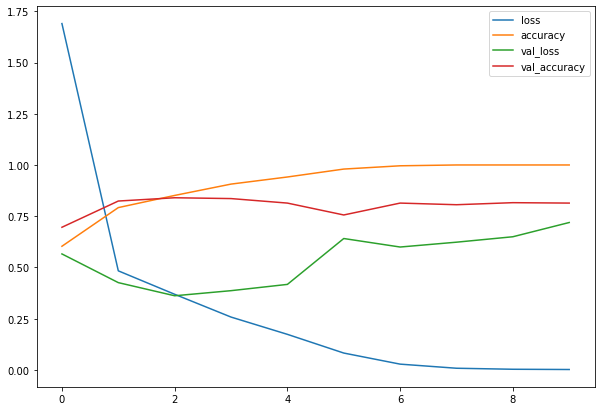

In [33]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [34]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["accuracy"])) # cualquiera

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

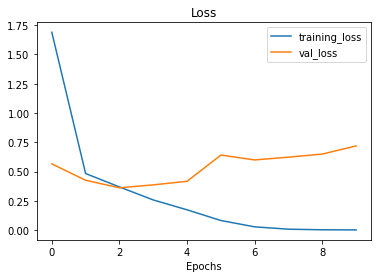

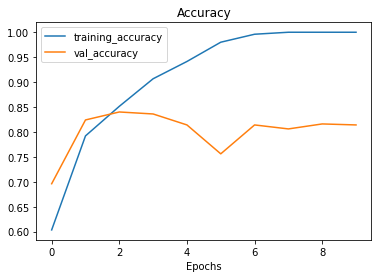

In [35]:
plot_loss_curves(history_4)

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Adjust the model parameters

1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting 

and there are few more things that we can try to overfit our model:
* Increase convolutional layers
* Increase convolutional filters
* Add another dense layer to the output of our flattened layer


We will build:
* A Convnet with max pooling
* A Convnet with max pooling and data augmentation


## Model 5

In [37]:
# 0. seet seed
tf.random.set_seed(42)

# create model
model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # squeeze the features on the image
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 9s 188ms/step - loss: 0.6102 - accuracy: 0.6473 - val_loss: 0.4657 - val_accuracy: 0.7880
Epoch 2/10
47/47 [==============================] - 9s 184ms/step - loss: 0.4551 - accuracy: 0.7887 - val_loss: 0.4274 - val_accuracy: 0.7980
Epoch 3/10
47/47 [==============================] - 9s 182ms/step - loss: 0.3992 - accuracy: 0.8233 - val_loss: 0.3489 - val_accuracy: 0.8580
Epoch 4/10
47/47 [==============================] - 9s 182ms/step - loss: 0.3784 - accuracy: 0.8353 - val_loss: 0.3393 - val_accuracy: 0.8480
Epoch 5/10
47/47 [==============================] - 9s 197ms/step - loss: 0.3679 - accuracy: 0.8387 - val_loss: 0.3439 - val_accuracy: 0.8500
Epoch 6/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3502 - accuracy: 0.8533 - val_loss: 0.3179 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 9s 183ms/step - loss: 0.3385 - accuracy: 0.8533 - val_loss: 0.3029 - val_accuracy: 0.8740
Epoch 

In [38]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [39]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


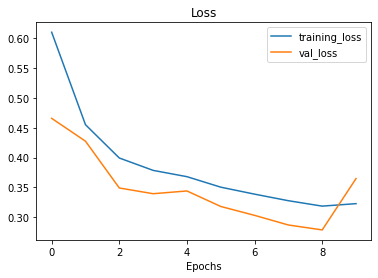

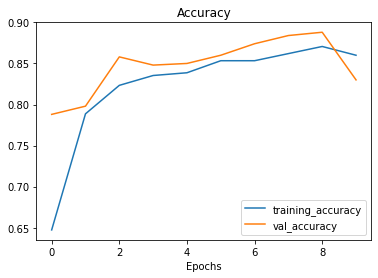

In [40]:
plot_loss_curves(history_5)

## Augmented Data

In [42]:
# ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate image between 0 and 20 degrees
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)


test_datagen = ImageDataGenerator(rescale=1/255.)



In [48]:
print("Augmented training images:")
train_data_augmented_1 = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

print("Non-augmented training images:")
train_data_1 = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)


print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [70]:
print(1500/32)

46.875


In [66]:
# Get data batch samples
images, labels = train_data_1.next()

In [67]:
augmented_images, augmented_labels = train_data_augmented_1.next()

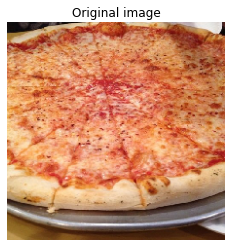

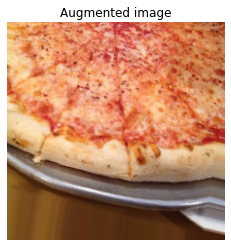

In [80]:
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# Model 6


In [81]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_6 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), # reduce feature by half
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)), 
  MaxPool2D(),
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)), 
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# 2. Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(train_data_augmented_1,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_1),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 22s 464ms/step - loss: 0.7055 - accuracy: 0.4967 - val_loss: 0.6780 - val_accuracy: 0.5840
Epoch 2/10
47/47 [==============================] - 22s 463ms/step - loss: 0.6948 - accuracy: 0.5373 - val_loss: 0.6536 - val_accuracy: 0.5860
Epoch 3/10
47/47 [==============================] - 23s 492ms/step - loss: 0.6866 - accuracy: 0.5713 - val_loss: 0.6172 - val_accuracy: 0.6920
Epoch 4/10
47/47 [==============================] - 23s 482ms/step - loss: 0.7506 - accuracy: 0.5553 - val_loss: 0.6929 - val_accuracy: 0.5040
Epoch 5/10
47/47 [==============================] - 22s 462ms/step - loss: 0.6945 - accuracy: 0.4927 - val_loss: 0.6916 - val_accuracy: 0.6180
Epoch 6/10
47/47 [==============================] - 22s 460ms/step - loss: 0.6939 - accuracy: 0.5233 - val_loss: 0.6858 - val_accuracy: 0.7280
Epoch 7/10
47/47 [==============================] - 22s 463ms/step - loss: 0.6639 - accuracy: 0.6120 - val_loss: 0.5986 - val_accuracy: 0.7020

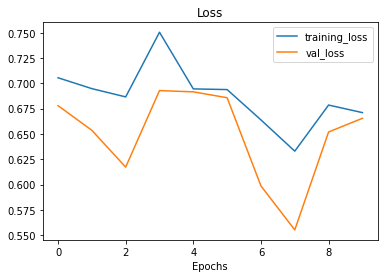

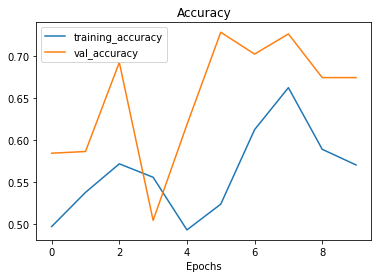

In [82]:
plot_loss_curves(history_6)

Model 6 did not perform well, it was caused by not having shuffled the data

In [83]:
train_data_augmented_2 = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


# Model 7

In [84]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size=2), # reduce feature by half
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)), 
  MaxPool2D(),
  Conv2D(10, 3, activation="relu", input_shape=(224,224,3)), 
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# 2. Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(train_data_augmented_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_2),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 23s 484ms/step - loss: 0.6500 - accuracy: 0.6053 - val_loss: 0.5094 - val_accuracy: 0.7600
Epoch 2/10
47/47 [==============================] - 22s 458ms/step - loss: 0.5206 - accuracy: 0.7460 - val_loss: 0.3962 - val_accuracy: 0.8300
Epoch 3/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4761 - accuracy: 0.7793 - val_loss: 0.3263 - val_accuracy: 0.8520
Epoch 4/10
47/47 [==============================] - 21s 455ms/step - loss: 0.4562 - accuracy: 0.7940 - val_loss: 0.3158 - val_accuracy: 0.8780
Epoch 5/10
47/47 [==============================] - 21s 457ms/step - loss: 0.4768 - accuracy: 0.7853 - val_loss: 0.4329 - val_accuracy: 0.7880
Epoch 6/10
47/47 [==============================] - 22s 459ms/step - loss: 0.4309 - accuracy: 0.8147 - val_loss: 0.3117 - val_accuracy: 0.8760
Epoch 7/10
47/47 [==============================] - 22s 478ms/step - loss: 0.4331 - accuracy: 0.8187 - val_loss: 0.3286 - val_accuracy: 0.8660

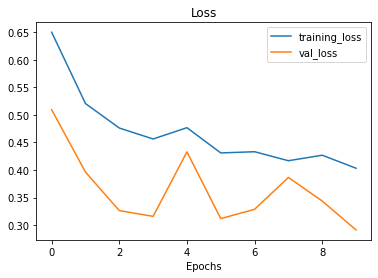

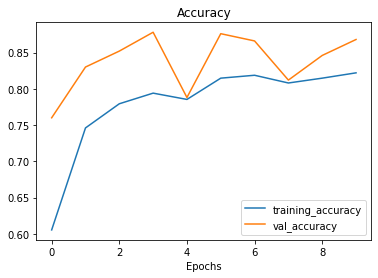

In [85]:
plot_loss_curves(history_7)

# REPEAT UNTIL SATISIFED!!!😡

* Increase number of layers
* Increase number of neurons
* Increas number of filters (CONV2D)
* Train for longer
* Find ideal learning rate
* More data
* Use **Transfer Learning** to leverage models

In [93]:
tf.random.set_seed(42)

model_8 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_2,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_2),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 24s 509ms/step - loss: 0.6732 - accuracy: 0.5613 - val_loss: 0.5266 - val_accuracy: 0.7780
Epoch 2/10
47/47 [==============================] - 25s 533ms/step - loss: 0.5025 - accuracy: 0.7487 - val_loss: 0.4199 - val_accuracy: 0.8000
Epoch 3/10
47/47 [==============================] - 22s 475ms/step - loss: 0.5194 - accuracy: 0.7580 - val_loss: 0.4253 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 22s 467ms/step - loss: 0.4731 - accuracy: 0.7873 - val_loss: 0.3485 - val_accuracy: 0.8360
Epoch 5/10
47/47 [==============================] - 22s 466ms/step - loss: 0.4966 - accuracy: 0.7713 - val_loss: 0.3570 - val_accuracy: 0.8520
Epoch 6/10
47/47 [==============================] - 23s 482ms/step - loss: 0.4657 - accuracy: 0.7753 - val_loss: 0.3327 - val_accuracy: 0.8600
Epoch 7/10
47/47 [==============================] - 23s 486ms/step - loss: 0.4671 - accuracy: 0.7820 - val_loss: 0.3564 - val_accuracy: 0.8680

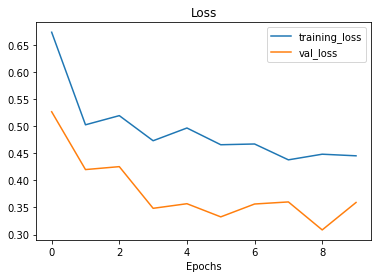

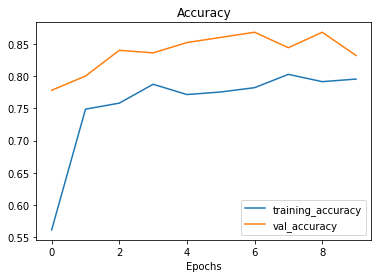

In [94]:
plot_loss_curves(history_8)